In [29]:
import networkx as nx

from openqaoa.problems import Knapsack
#Inner OpenQAOA function for ploting graphs
#plot_graph(graph)

# Create a MaximumCut instance from the graph and get its QUBO and hamiltonian
knapsack_prob = Knapsack.random_instance(n_items=5)
print(knapsack_prob.problem_instance)
knapsack_qubo = knapsack_prob.qubo
knapsack_hamiltonian = knapsack_qubo.hamiltonian


{'problem_type': 'knapsack', 'values': [1, 2, 1, 1, 3], 'weights': [4, 4, 3, 1, 3], 'weight_capacity': 7, 'penalty': 6, 'n_items': 5}
8


In [ ]:
{'problem_type': 'knapsack', 'values': [9, 1, 1, 1, 9, 8, 6, 4, 6, 3], 'weights': [5, 6, 1, 1, 4, 1, 2, 6, 7, 6], 'weight_capacity': 16, 'penalty': 18, 'n_items': 10}

In [ ]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account('825a8b2e6fb861f63088f866e59357e49447b4b9b24ff6136e56dcc28f2fb0cedda6c2976b9e2aef48129a80864265494be7f8a7aae5b9ebd6654a7d80d9b5cb')

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 5619.88it/s]


params = 3-standard-rand-x-Nelder-Mead
itr  1
params = 3-standard-rand-x-Powell
itr  2
params = 3-standard-rand-x-COBYLA
itr  3






100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 144.23it/s]


params = 3-standard-rand-xy-Nelder-Mead
itr  4
params = 3-standard-rand-xy-Powell
itr  5
params = 3-standard-rand-xy-COBYLA
itr  6





  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


params = 3-standard-ramp-x-Nelder-Mead
itr  7
params = 3-standard-ramp-x-Powell
itr  8
params = 3-standard-ramp-x-COBYLA
itr  9






100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 40.54it/s]


params = 3-standard-ramp-xy-Nelder-Mead
itr  10
params = 3-standard-ramp-xy-Powell
itr  11
params = 3-standard-ramp-xy-COBYLA
itr  12




  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3010.99it/s]


params = 3-standard_w_bias-rand-x-Nelder-Mead
itr  13
params = 3-standard_w_bias-rand-x-Powell
itr  14
params = 3-standard_w_bias-rand-x-COBYLA
itr  15






100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 161.14it/s]


params = 3-standard_w_bias-rand-xy-Nelder-Mead
itr  16
params = 3-standard_w_bias-rand-xy-Powell
itr  17
params = 3-standard_w_bias-rand-xy-COBYLA
itr  18





  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


params = 3-standard_w_bias-ramp-x-Nelder-Mead
itr  19
params = 3-standard_w_bias-ramp-x-Powell
itr  20
params = 3-standard_w_bias-ramp-x-COBYLA
itr  21






100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 45.05it/s]

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 19.55it/s]

params = 3-standard_w_bias-ramp-xy-Nelder-Mead
itr  22
params = 3-standard_w_bias-ramp-xy-Powell
itr  23
params = 3-standard_w_bias-ramp-xy-COBYLA
itr  24




  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2999.50it/s]


params = 3-annealing-rand-x-Nelder-Mead
itr  25
params = 3-annealing-rand-x-Powell
itr  26
params = 3-annealing-rand-x-COBYLA
itr  27






100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 185.24it/s]


params = 3-annealing-rand-xy-Nelder-Mead
itr  28
params = 3-annealing-rand-xy-Powell
itr  29
params = 3-annealing-rand-xy-COBYLA
itr  30





  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


params = 3-annealing-ramp-x-Nelder-Mead
itr  31
params = 3-annealing-ramp-x-Powell
itr  32
params = 3-annealing-ramp-x-COBYLA
itr  33






 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  6.86it/s]

params = 3-annealing-ramp-xy-Nelder-Mead
itr  34
params = 3-annealing-ramp-xy-Powell
itr  35
params = 3-annealing-ramp-xy-COBYLA
itr  36



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 4-standard-rand-x-Nelder-Mead
itr  37
(-34.0, ['01001011111000'])






 33%|██████████████████████████                                                    | 1/3 [1:25:31<2:51:03, 5131.78s/it]

params = 4-standard-rand-x-Powell
itr  38
(-34.0, ['01001011111000'])






 67%|████████████████████████████████████████████████████                          | 2/3 [4:07:07<2:10:16, 7816.72s/it]

params = 4-standard-rand-x-COBYLA
itr  39






100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [4:19:01<00:00, 5180.34s/it]



 50%|██████████████████████████████████████▌                                      | 1/2 [4:19:01<4:19:01, 15541.03s/it]

(-34.0, ['01001011111000'])






  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 4-standard-rand-xy-Nelder-Mead
itr  40
(-34.0, ['01001011111000'])






 33%|██████████████████████████                                                    | 1/3 [2:13:51<4:27:42, 8031.34s/it]

params = 4-standard-rand-xy-Powell
itr  41
(-34.0, ['01001011111000'])






 67%|████████████████████████████████████████████████████                          | 2/3 [2:29:15<1:04:10, 3850.52s/it]

params = 4-standard-rand-xy-COBYLA
itr  42






100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [2:44:36<00:00, 3292.12s/it]



100%|███████████████████████████████████████████████████████████████████████████████| 2/2 [7:03:37<00:00, 12708.72s/it]


 50%|██████████████████████████████████████▌                                      | 1/2 [7:03:37<7:03:37, 25417.44s/it]

(-34.0, ['01001011111000'])





  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 4-standard-ramp-x-Nelder-Mead
itr  43
(-34.0, ['01001011111000'])






 33%|██████████████████████████                                                    | 1/3 [1:14:10<2:28:21, 4450.87s/it]

params = 4-standard-ramp-x-Powell
itr  44


(-34.0, ['01001011111000'])


 67%|████████████████████████████████████████████████████                          | 2/3 [2:04:56<1:00:24, 3624.10s/it]

params = 4-standard-ramp-x-COBYLA
itr  45






100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [2:12:20<00:00, 2646.80s/it]



 50%|███████████████████████████████████████                                       | 1/2 [2:12:20<2:12:20, 7940.41s/it]

(-34.0, ['01001011111000'])






  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 4-standard-ramp-xy-Nelder-Mead
itr  46






 33%|██████████████████████████                                                    | 1/3 [2:25:49<4:51:39, 8749.67s/it]

(-34.0, ['01001011111000'])
params = 4-standard-ramp-xy-Powell
itr  47
(-34.0, ['01001011111000'])


C:\Users\Adriano\AppData\Local\Temp\ipykernel_10712\1616754186.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7,4))




 67%|████████████████████████████████████████████████████                          | 2/3 [3:06:48<1:24:09, 5049.45s/it]

params = 4-standard-ramp-xy-COBYLA
itr  48
(-34.0, ['01001011111000'])






100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [3:21:36<00:00, 4032.17s/it]



100%|███████████████████████████████████████████████████████████████████████████████| 2/2 [5:33:56<00:00, 10018.47s/it]


100%|██████████████████████████████████████████████████████████████████████████████| 2/2 [12:37:34<00:00, 22727.20s/it]

 33%|█████████████████████████                                                  | 1/3 [12:37:34<25:15:08, 45454.40s/it]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 4-standard_w_bias-rand-x-Nelder-Mead
itr  49


(-34.0, ['01001011111000'])


 33%|██████████████████████████                                                    | 1/3 [1:24:23<2:48:46, 5063.28s/it]

params = 4-standard_w_bias-rand-x-Powell
itr  50


 50%|█████████████████████████████████████▌                                     | 1/2 [14:15:33<14:15:33, 51333.85s/it]


KeyboardInterrupt: 

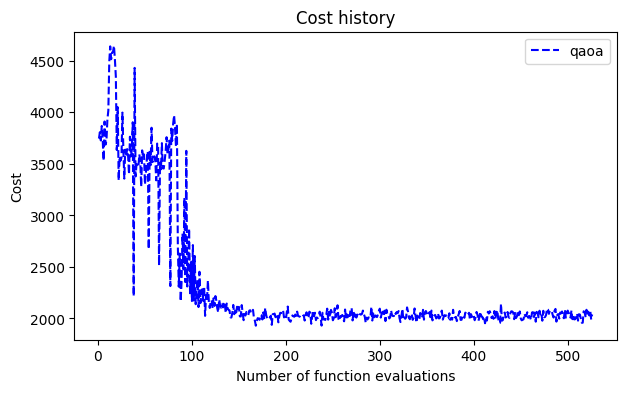

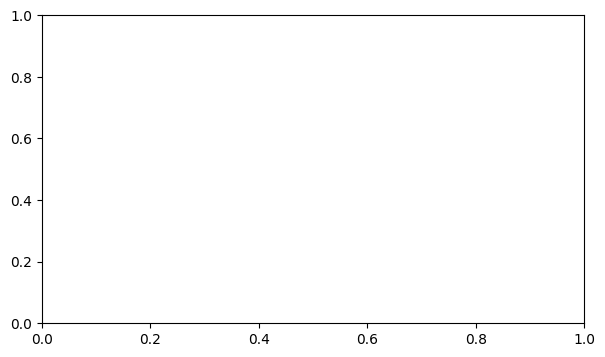

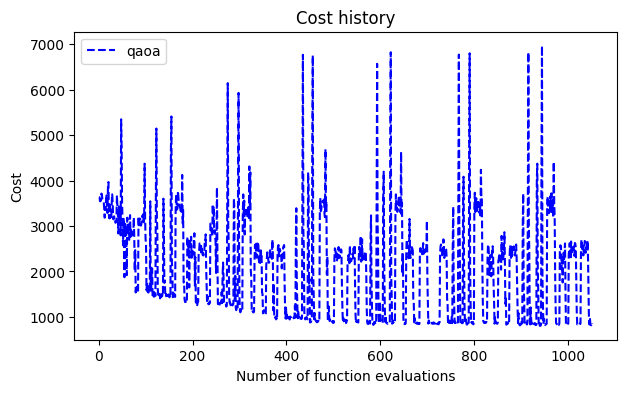

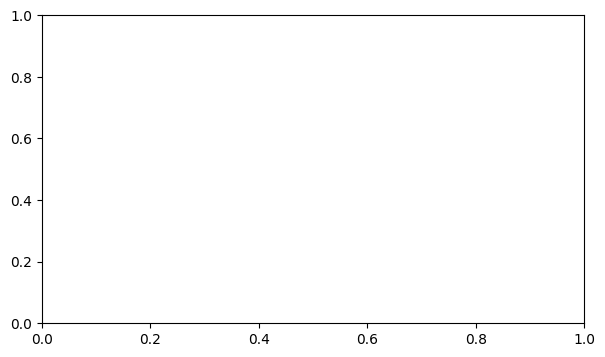

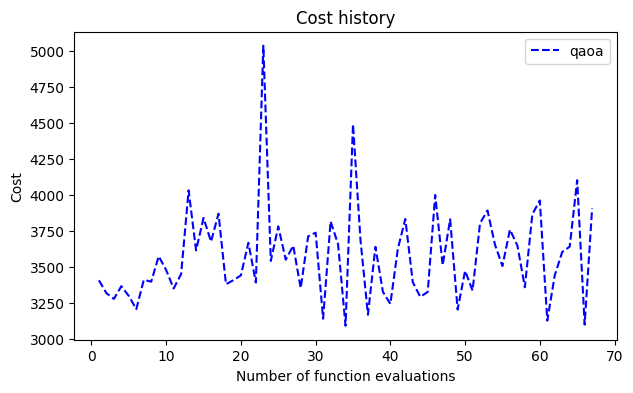

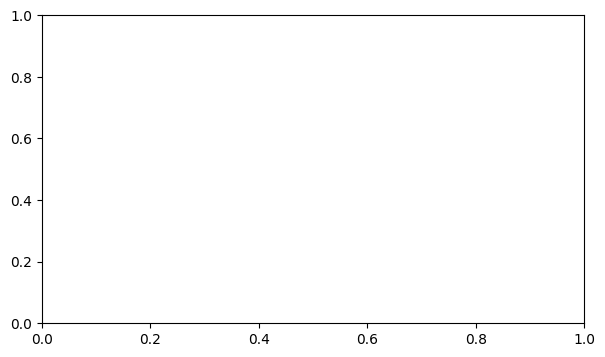

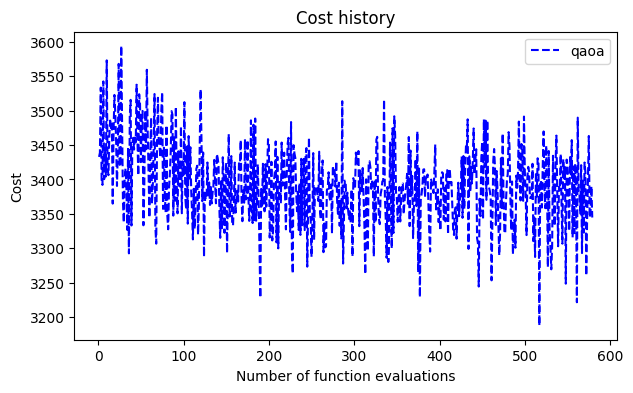

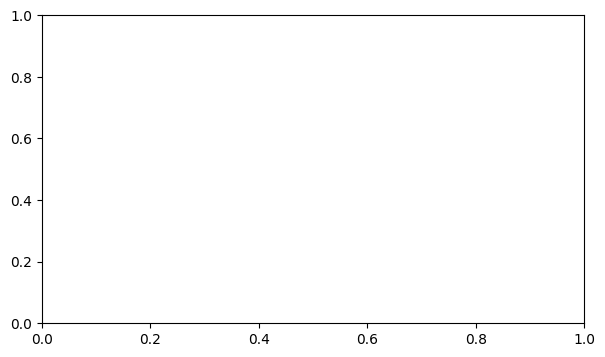

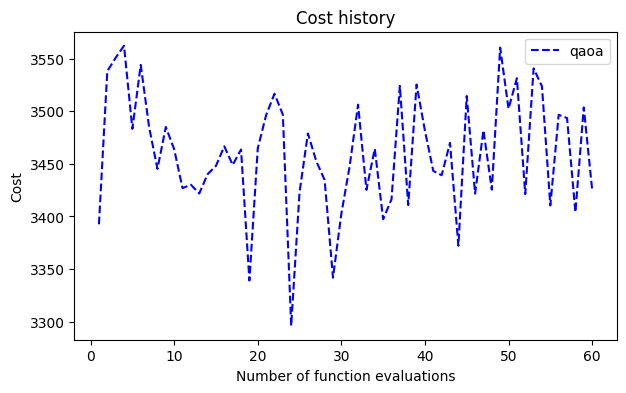

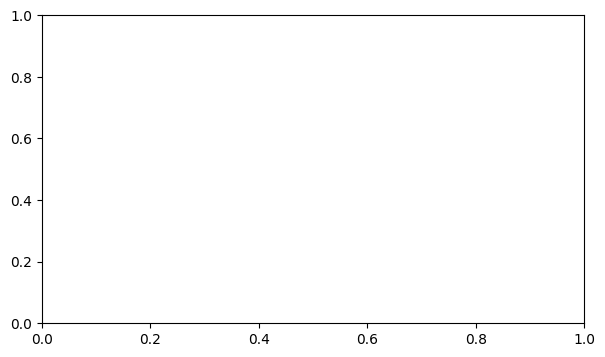

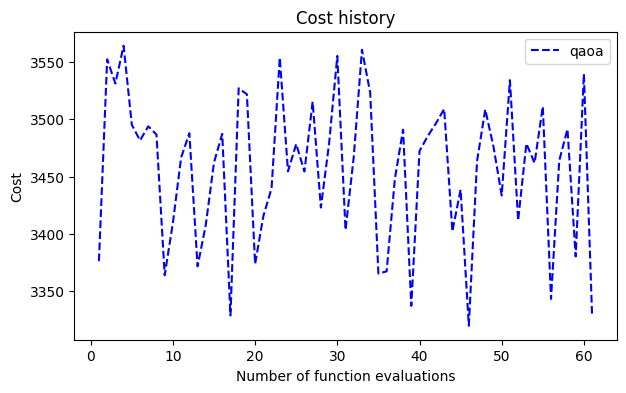

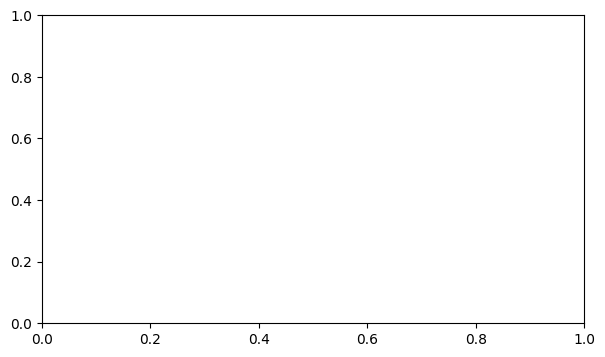

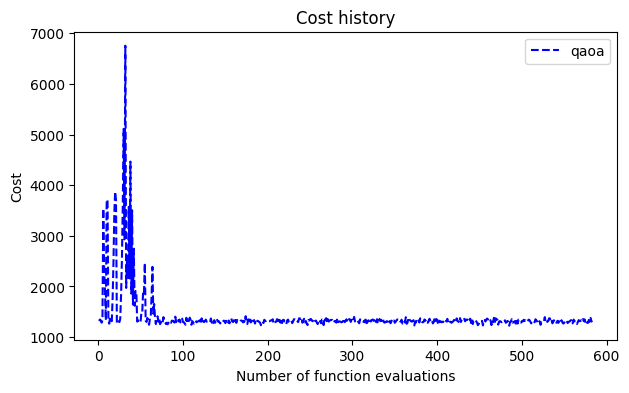

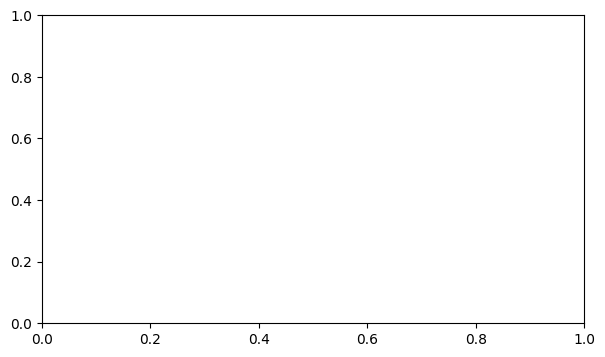

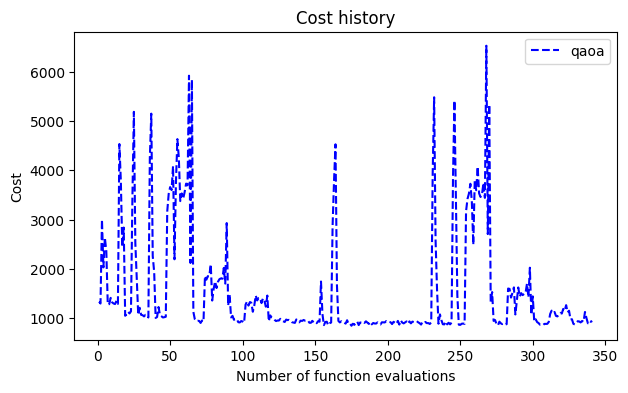

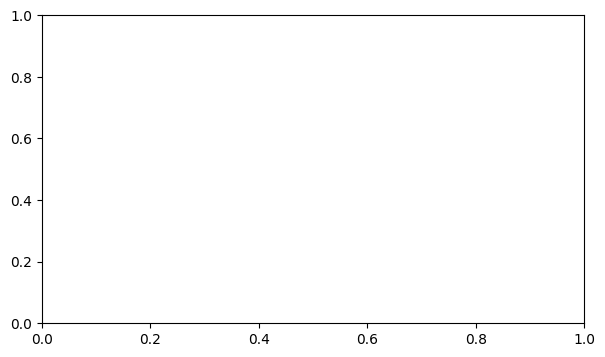

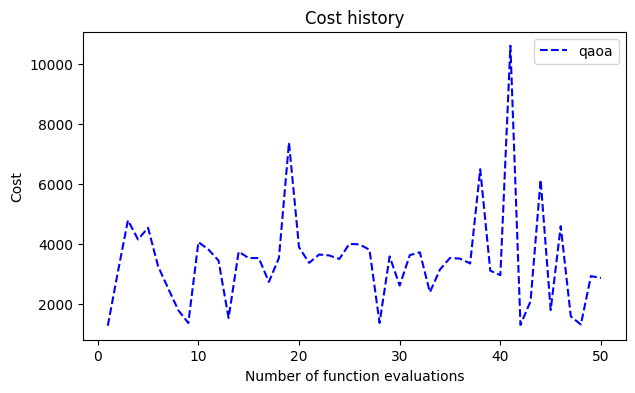

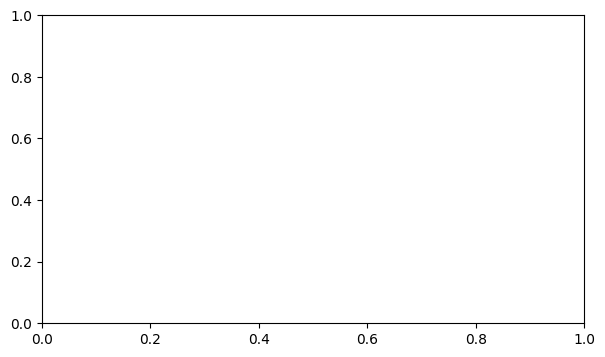

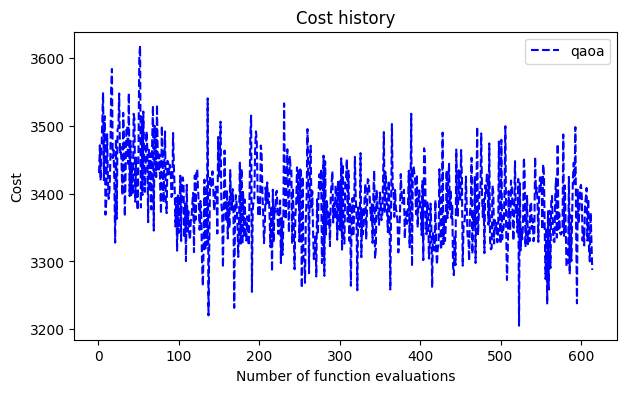

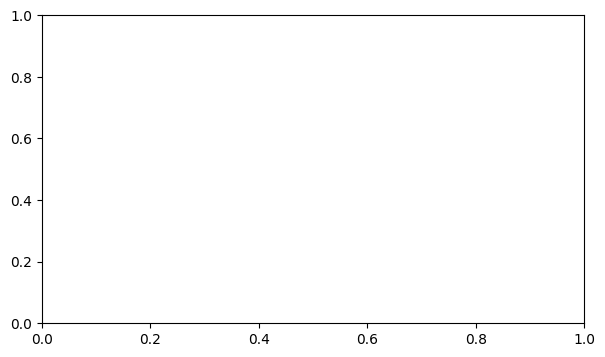

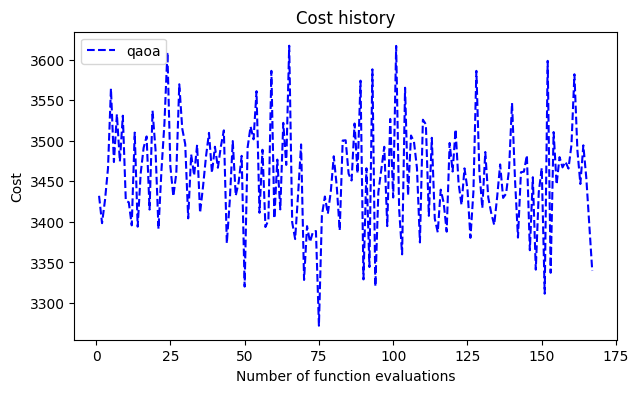

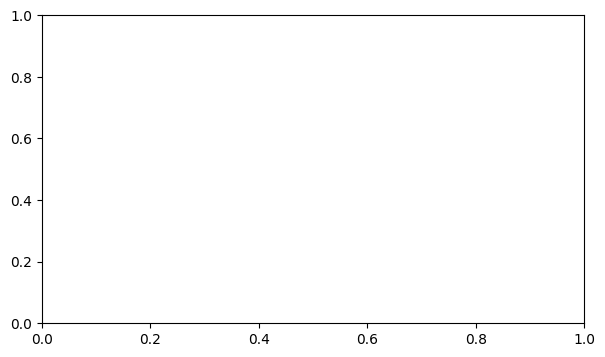

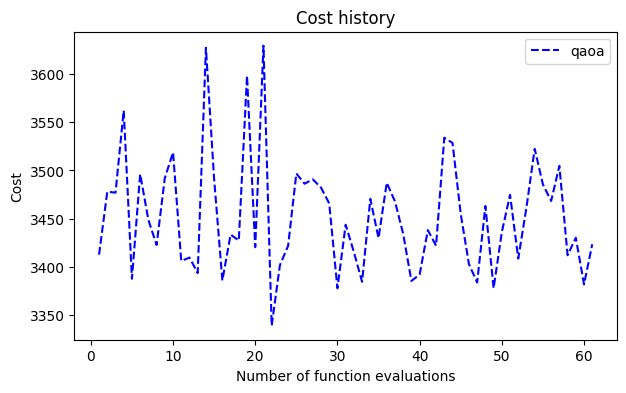

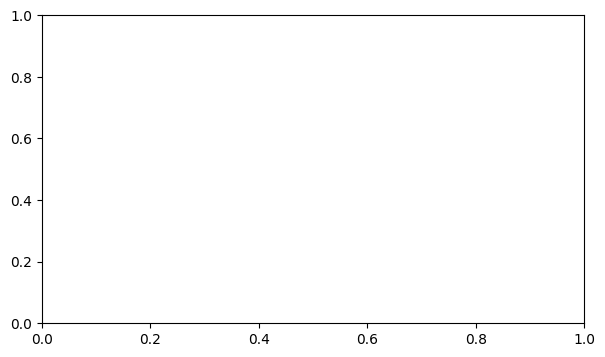

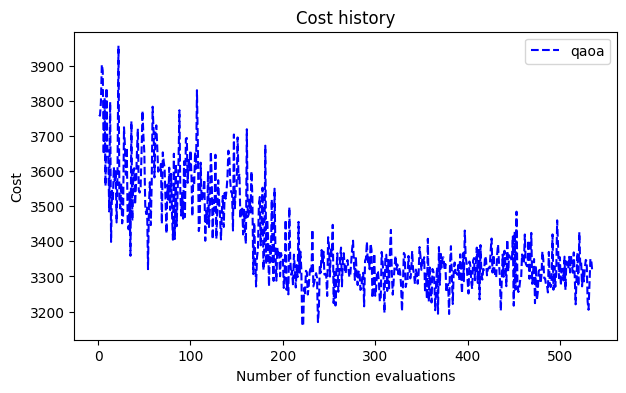

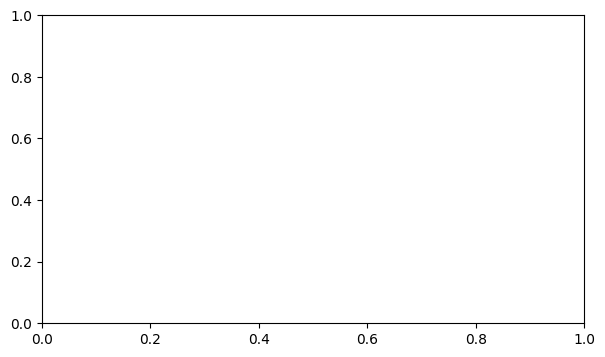

In [3]:
from tqdm import tqdm
from openqaoa.backends import create_device
from openqaoa import QAOA
from openqaoa.utilities import ground_state_hamiltonian
import matplotlib.pyplot as plt

itr = 0
yahice = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]
ps = [3, 4]
param_types = ["standard", "standard_w_bias", "annealing"]
init_types = ["rand", "ramp"]
mixer_hams = ["x", "xy"]
optimizers = ["Nelder-Mead", "Powell", "COBYLA"]
for p in tqdm(ps):
    for param_type in tqdm(param_types):
        for init_type in tqdm(init_types):
            for mixer_hamiltonian in tqdm(mixer_hams):
                for optimizer in tqdm(optimizers):
                    print("params = %s-%s-%s-%s-%s" % (str(p), str(param_type), str(init_type), str(mixer_hamiltonian), str(optimizer)))
                    itr = itr+1
                    print('itr ',itr)
                    if itr in yahice:
                        continue
                    
                    q1 = QAOA()
                    #qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
                    qiskit_device = create_device(location='ibmq', name='ibmq_qasm_simulator')
                    q1.set_device(qiskit_device)
                    q1.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
                    q1.set_backend_properties(n_shots=5000, seed_simulator=1)
                    q1.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,
                    optimization_progress=True, cost_progress=True, parameter_log=True)
                    q1.compile(knapsack_qubo)
                    q1.optimize()
                    correct_solution1 = ground_state_hamiltonian(q1.cost_hamil)
                    print(correct_solution1)
                    opt_results1 = q1.result
                    '''
                    noise_model = add_depolarizing_error(NoiseModel(),0.1)
                    q2 = QAOA()
                    qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
                    q2.set_device(qiskit_device)
                    q2.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
                    q2.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,
                                            optimization_progress=True, cost_progress=True, parameter_log=True)
                    q2.set_backend_properties(n_shots=5000, seed_simulator=1,
                                            noise_model=noise_model)
                    q2.compile(knapsack_qubo)
                    q2.optimize()
                    correct_solution2 = ground_state_hamiltonian(q2.cost_hamil)
                    opt_results2 = q2.result
                    print(correct_solution2)
                    qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
                    q3 = QAOA()
                    q3.set_device(qiskit_device)
                    q3.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
                    q3.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,
                                            optimization_progress=True, cost_progress=True, parameter_log=True)
                    q3.set_backend_properties(n_shots=5000, seed_simulator=1, noise_model=noise_model)
                    q3.set_error_mitigation_properties(error_mitigation_technique='mitiq_zne',n_batches=64,calibration_data_location="caldata.json")
                    q3.compile(knapsack_qubo)
                    q3.optimize()
                    correct_solution3 = ground_state_hamiltonian(q3.cost_hamil)
                    print(correct_solution3)
                    opt_results3 = q3.result
                    '''
                    #plot_cost(opt_results2,)

                    fig, ax = plt.subplots(figsize=(7,4))
                    opt_results1.plot_cost(figsize=(7,4),color='blue',label='qaoa',ax=ax)
                    #opt_results2.plot_cost(figsize=(7,4),color='red',label='qaoa+noise',ax=ax)
                    #opt_results3.plot_cost(figsize=(7,4),color='green',label='qaoa+noise+zne',ax=ax)
                    plt.savefig("%s-%s-%s-%s-%s-1.png" % (str(p), str(param_type), str(init_type), str(mixer_hamiltonian), str(optimizer)))
                    fig2, ax2 = plt.subplots(figsize=(7,4))
                    #opt_results2.plot_cost(figsize=(7,4),color='red',label='qaoa+noise',ax=ax2)
                    #opt_results3.plot_cost(figsize=(7,4),color='green',label='qaoa+noise+zne',ax=ax2)
                    #plt.savefig("%s-%s-%s-%s-%s-2.png" % (str(p), str(param_type), str(init_type), str(mixer_hamiltonian), str(optimizer)))